In [ ]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.1                         
year           2021                        
month          08                          
day            10                          
svn rev        80725                       
language       R                           
version.string R version 4.1.1 (2021-08-10)
nickname       Kick Things                 

In [ ]:
install.packages("BiocManager") # install BiocManager
library(BiocManager)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 1. Toy example

Example codes for GRanges & SummarizedExperiements class

In [ ]:
BiocManager::install("GenomicRanges")
library(GenomicRanges)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'GenomicRanges'

also installing the dependencies ‘bitops’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘XVector’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'lubridate', 'mime', 'openssl', 'pillar', 'pkgload',
  'rcmdcheck', 'readr', 'remotes', 'rlang', 'rvest', 'stringi', 'systemfonts',
  'testthat', 'tibble', 'tidyr', 'tinytex', 'usethis', 'xfun', 'mgcv', 'nlme'

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, 

## 1) Granges

GRanges object

In [ ]:
gene_model <- GRangesList(txn1 = GRanges("A", IRanges(start = c(100, 700), end = c(500, 900))),
txn2 = GRanges("A", IRanges(start = c(200, 700), end = c(500, 900))))

In [ ]:
gene_model

GRangesList object of length 2:
$txn1
GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        A   100-500      *
  [2]        A   700-900      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

$txn2
GRanges object with 2 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        A   200-500      *
  [2]        A   700-900      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths


In [ ]:
range(gene_model)

GRangesList object of length 2:
$txn1
GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        A   100-900      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

$txn2
GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        A   200-900      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths


In [ ]:
setdiff(range(gene_model), gene_model)

GRangesList object of length 2:
$txn1
GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        A   501-699      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

$txn2
GRanges object with 1 range and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        A   501-699      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths


SummarizedExperiment

In [ ]:
BiocManager::install("SummarizedExperiment")
library(SummarizedExperiment)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'SummarizedExperiment'

also installing the dependencies ‘matrixStats’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’


Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'lubridate', 'mime', 'openssl', 'pillar', 'pkgload',
  'rcmdcheck', 'readr', 'remotes', 'rlang', 'rvest', 'stringi', 'systemfonts',
  'testthat', 'tibble', 'tidyr', 'tinytex', 'usethis', 'xfun', 'mgcv', 'nlme'

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDi

In [ ]:
nrows <- 200
ncols <- 6
counts <- matrix(runif(nrows * ncols, 1, 1e4), nrows)
rowRanges <- GRanges(rep(c("chr1", "chr2"), c(50, 150)),
                     IRanges(floor(runif(200, 1e5, 1e6)), width=100),
                     strand=sample(c("+", "-"), 200, TRUE),
                     feature_id=sprintf("ID%03d", 1:200))
colData <- DataFrame(Treatment=rep(c("ChIP", "Input"), 3),
                     row.names=LETTERS[1:6])

exp <- SummarizedExperiment(assays=list(counts=counts),
                     rowRanges=rowRanges, colData=colData)

In [ ]:
exp

class: RangedSummarizedExperiment 
dim: 200 6 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(1): feature_id
colnames(6): A B ... E F
colData names(1): Treatment

In [ ]:
exp@assays@data$counts

4329.4803,1331.4388,8964.89824,3155.8141,5025.4674,1907.05943
2116.8740,7127.8299,3625.95414,8280.1976,5443.4406,3971.21773
7381.3655,3991.4666,4147.08105,5008.9632,133.7086,4466.84851
9343.4349,8619.6998,3103.86696,1173.3504,1981.0958,70.95307
3243.5818,8955.2656,8327.08625,5696.6092,7556.7453,1404.04916
9445.6258,6772.2935,8012.61548,5056.0403,9924.6365,5920.12913
1638.2602,2692.4430,4408.13738,7198.3670,4431.0702,9875.31006
7423.4750,9098.6102,4372.67810,2193.9187,2623.2761,4692.86853
8626.4884,6252.0107,7049.32543,301.8043,6911.1154,4750.66394
9057.2926,8847.2366,4771.32383,7745.4704,4281.9962,3711.36755
6947.4525,3392.0416,9608.28353,3091.3220,9781.3111,5648.88650


In [ ]:
exp@rowRanges

GRanges object with 200 ranges and 1 metadata column:
        seqnames        ranges strand |  feature_id
           <Rle>     <IRanges>  <Rle> | <character>
    [1]     chr1 343671-343770      + |       ID001
    [2]     chr1 565766-565865      + |       ID002
    [3]     chr1 684039-684138      - |       ID003
    [4]     chr1 827187-827286      - |       ID004
    [5]     chr1 969361-969460      - |       ID005
    ...      ...           ...    ... .         ...
  [196]     chr2 971705-971804      + |       ID196
  [197]     chr2 167084-167183      + |       ID197
  [198]     chr2 407703-407802      - |       ID198
  [199]     chr2 104090-104189      - |       ID199
  [200]     chr2 882011-882110      + |       ID200
  -------
  seqinfo: 2 sequences from an unspecified genome; no seqlengths

# 2. Acute lymphocytic leukemia (ALL) data analaysis
Contrast in gene expression between ALL patients with two specific forms of chromosomal translocation
The first group consists of patients with a translocation between chromosomes 4 and 11 (labeled ALL1/AF4).
The second group consists of patients with a translocation between chromosomes 9 and 22 (labeled BCR/ABL)

## 0) Install & Library

In [ ]:
BiocManager::install("ALL") # install ALL data pacakage
library(ALL)

BiocManager::install("limma") # install limma pacakage for analysis of gene expression microarray data
library(limma)

# install.packages("RSQLite") # install RSQLite for connecting DB

BiocManager::install("hgu95av2.db") # DB of human genome
library(hgu95av2.db)

BiocManager::install("GOstats") # install GOstats for Gene Ontology analysis
library(GOstats)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'ALL'

Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'lubridate', 'mime', 'openssl', 'pillar', 'pkgload',
  'rcmdcheck', 'readr', 'remotes', 'rlang', 'rvest', 'stringi', 'systemfonts',
  'testthat', 'tibble', 'tidyr', 'tinytex', 'usethis', 'xfun', 'mgcv', 'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'limma'

Old packages: 'cpp11', 'data.table', 'desc', 'diffobj', 'digest', 'hms',
  'knitr', 'lifecycle', 'lubridate', 'mime', 'openssl', 'pillar', 'pkgload',
  'rcmdcheck', '

## 1) Import & Prep data

In [ ]:
data(ALL) # import ALL data

In [ ]:
show(ALL) # total summary - 12625 features, 128 samples

ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 128 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 01005 01010 ... LAL4 (128 total)
  varLabels: cod diagnosis ... date last seen (21 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 14684422 16243790 
Annotation: hgu95av2 


In [ ]:
eset <- ALL[, ALL$mol %in% c("BCR/ABL", "ALL1/AF4")] # subset two subtypes

In [ ]:
show(eset) # 47 selected samples: 10 ALL1/AF4, 37 BCR/ABL

ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 47 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 01005 03002 ... 84004 (47 total)
  varLabels: cod diagnosis ... date last seen (21 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 14684422 16243790 
Annotation: hgu95av2 


## 2) Differential Expression

Fit linear model & get significance using empirical Bayesian model

In [ ]:
f <- factor(as.character(eset$mol)) # factor of subtypes
design <- model.matrix(~f) # design matrix (Y = Xβ)
fit <- lmFit(eset, design) # simple linear regression
fit <- eBayes(fit) # Using output of fitted lm, calculate Empirical Bayes Statistics for Differential Expression
topTable(fit, coef = 2) # results: significance of each genes

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1914_at,-3.076231,4.611284,-27.49860,4.663431e-31,5.887581e-27,56.32653
37809_at,-3.971906,4.864721,-19.75478,1.033405e-24,5.896502e-21,44.23832
36873_at,-3.391662,4.284529,-19.61497,1.401149e-24,5.896502e-21,43.97298
40763_at,-3.086992,3.474092,-17.00739,5.695120e-22,1.797522e-18,38.64615
34210_at,3.618194,8.438482,15.45655,2.809128e-20,7.093049e-17,35.10692
41448_at,-2.500488,3.733012,-14.83924,1.428253e-19,3.005283e-16,33.61391
33358_at,-2.269730,5.191015,-12.96398,2.638314e-17,4.758388e-14,28.76471
37978_at,-1.036051,6.937965,-10.48777,5.126800e-14,8.090730e-11,21.60216
40480_s_at,1.844998,7.826900,10.38214,7.206177e-14,1.010866e-10,21.27732


In [ ]:
design

,(Intercept),fBCR/ABL
1,1,1
2,1,1
3,1,0
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
10,1,1


Select significant genes (gene signature)

In [ ]:
selected <- p.adjust(fit$p.value[, 2]) < 0.05 # select significant genes after multiple test correction (default: Holm–Šidák method)
esetSel <- eset[selected, ]  # subset the experimentSet data with significant genes
dim(esetSel) # 165 significant genes

Features  Samples 
     165       47

## 3) Heatmap

Defining colors for each sample by group

In [ ]:
group_info <- as.numeric(esetSel$mol) # 1 for ALL1/AF4, 2 for BCR/ABL
colvec <- c("tomato", "midnightblue")[group_info] # 'tomato' for ALL1/AF4, 'midnightblue' for BCR/ABL

Heatmap analysis (hierarchical clustering row & colwise)

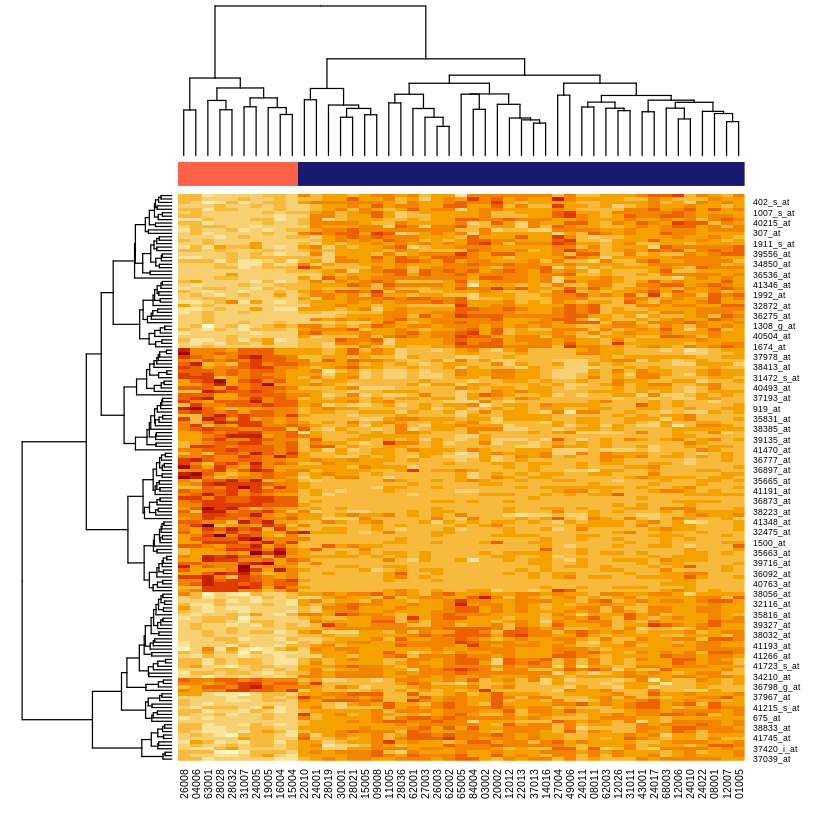

In [ ]:
heatmap(esetSel@assayData$exprs, ColSideColors = colvec) # each types clustered with gene signature

## 4) Gene Ontology test

Annotate to EntrezIDs

In [ ]:
entrezIds <- unique(setdiff(unlist(mget(featureNames(eset),hgu95av2ENTREZID)), NA)) # 8582 genes have EntrezId within 12625 total genes, excluding NAs
entrezIdsSel <- unique(setdiff(unlist(mget(featureNames(esetSel),hgu95av2ENTREZID)), NA)) # 33 genes have EntrezId within 165 significant genes, excluding NAs

Hypergenometric test: which GO terms are related to our significant gene set

In [ ]:
params <-  new("GOHyperGParams", # class name
               geneIds=entrezIdsSel, # selected genes
               universeGeneIds=entrezIds, # total genes
               annotation="hgu95av2.db", # DB name
               ontology="BP", # which GO category, BP (Biological Process), CC (Cellular Component), MF (Molecular Function)
               pvalueCutoff=0.01, #
               conditional=FALSE,
               testDirection="over") # make object 'GOHyperGParams'

res <- hyperGTest(params) # Hypergeometric test
df_res <- as.data.frame(summary(res)) # summary the results
topSig <- df_res[1:5,] # top 5 significant GO terms
topSig

,GOBPID,Pvalue,OddsRatio,ExpCount,Count,Size,Term
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,GO:1903037,1.548343e-06,4.770861,3.903268,16,247,regulation of leukocyte cell-cell adhesion
2,GO:1903039,1.605129e-06,5.423247,3.002514,14,190,positive regulation of leukocyte cell-cell adhesion
3,GO:0019221,2.503935e-06,3.207579,9.639650,26,610,cytokine-mediated signaling pathway
4,GO:0007159,6.546285e-06,4.223342,4.361547,16,276,leukocyte cell-cell adhesion
5,GO:0071345,9.527182e-06,2.747318,13.037232,30,825,cellular response to cytokine stimulus
